In [4]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage import rotate

In [5]:
file_path = "./data/assignmentMathImagingRecon_chestCT.mat"
with h5py.File(file_path, 'r') as mat_file:
    for key in mat_file.keys():
        print(f"Dataset: {key}, Shape: {mat_file[key].shape}")

Dataset: imageAC, Shape: (512, 512)


1


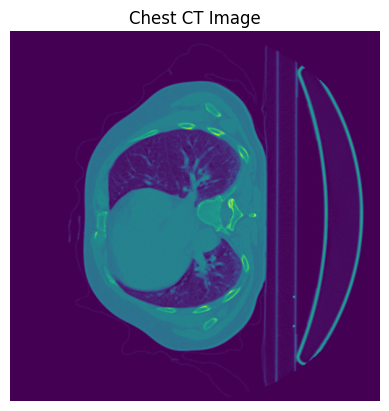

(512, 512)

In [6]:
#Loading Chest CT image
file_path = './data/assignmentMathImagingRecon_chestCT.mat'
with h5py.File(file_path, 'r') as mat:
    print(len(mat.keys()))
    dataset_name = list(mat.keys())[0]  
    chestCT = np.array(mat[dataset_name]) 
plt.imshow(chestCT)
plt.axis('off') 
plt.title("Chest CT Image")
plt.show()
chestCT.shape

In [7]:
def radon(image, theta):
    img_size = max(image.shape)
    sinogram = np.zeros((theta.shape[0], img_size))
    for i, angle in enumerate(theta):
        rotated = rotate(image, angle, reshape=False, order=1)
        sinogram[i] = np.sum(rotated, axis=0)

    return sinogram

In [8]:
def iradon(sinogram, theta):
    img_size = sinogram.shape[1]
    reconstructed = np.zeros((img_size, img_size))
    
    for i, angle in enumerate(theta):
        projection = np.tile(sinogram[i], (img_size, 1))
        rotated = rotate(projection, -angle, reshape=False, order=1)
        reconstructed += rotated
    
    return reconstructed / len(theta)

In [9]:
def rrmse(A, B):
    return np.sqrt(np.sum((A - B)**2)) / np.sqrt(np.sum(A**2))

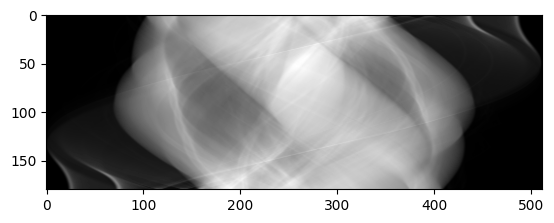

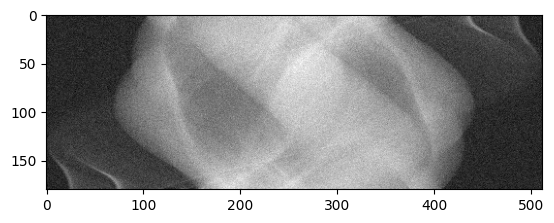

In [10]:
radon_image = radon(chestCT, np.arange(0, 180, 1))
radon_image_noisy = radon_image + 0.05 * np.max(radon_image) * np.random.randn(*radon_image.shape)

plt.imshow(radon_image, cmap='gray')
plt.show()
plt.imshow(radon_image_noisy, cmap='gray')
plt.show()